<a href="https://colab.research.google.com/github/iffatzahra/TSF-Task-1/blob/main/Student_Percentage_Prediction_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Author name** : Iffat Zahra
####**Data Science And Business Anlaytics Intern**
####**The Sparks Foundation**
---
####***Problem Statement: Predict the percentage of an student based on the no.of study hours***.   

In [1]:
# Importing Libraries & Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [2]:
# Importing Data
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Checking Data For Null Values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### **Our Data Containes No Null Value**

In [5]:
# Checking Some Important Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### **Visualizing Data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


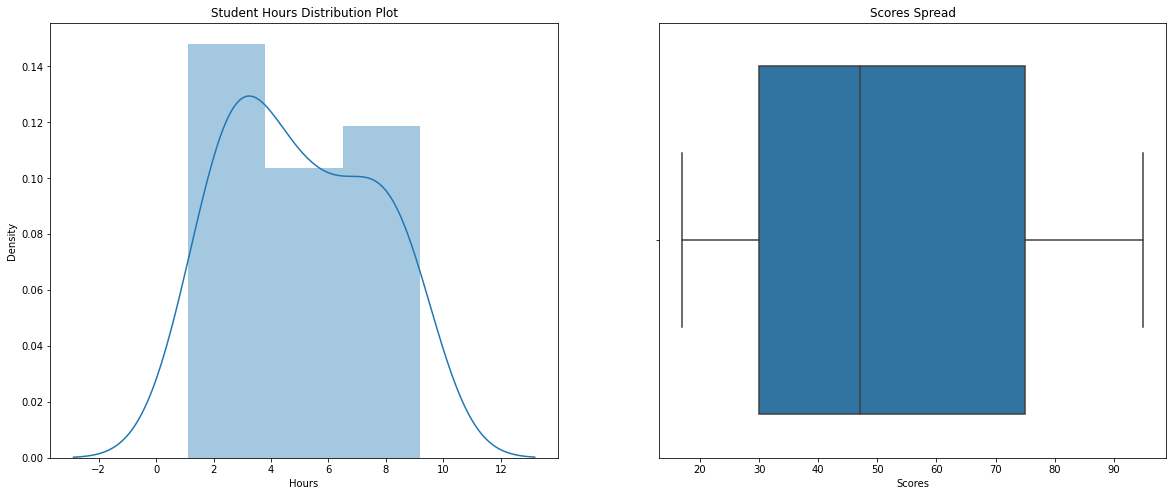

In [6]:
# Visualizing the data

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Student Hours Distribution Plot')
sns.distplot(df.Hours)

plt.subplot(1,2,2)
plt.title('Scores Spread')
sns.boxplot(df.Scores)

plt.show()

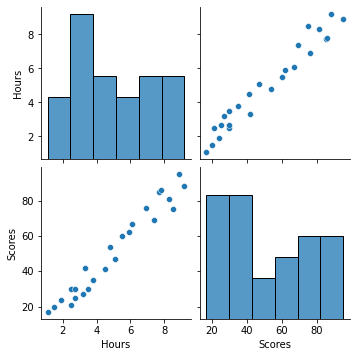

In [7]:
# Plotting Relations
sns.pairplot(df)

Let's Plot Our Data On A 2D Graph To Check If We Can Manually Find Any Relationship

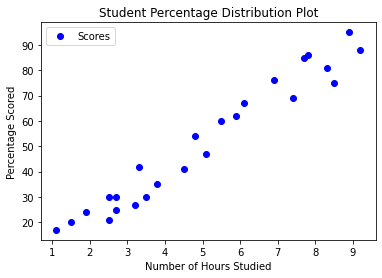

In [8]:
# Distribution of The Scores
df.plot(x = 'Hours', y = 'Scores', style = 'bo')
plt.xlabel("Number of Hours Studied")
plt.ylabel("Percentage Scored")
plt.title("Student Percentage Distribution Plot")
plt.show()

#####We Can Clearly See From Above Graph That There Is A **Linear Relation** Between Hours Studied And Percentage Score

Now We Will Separate Features And Labels From Our Data

In [9]:
df.shape

(25, 2)

In [10]:
features = df.iloc[:, :-1].values  
labels = df.iloc[:, 1].values

Now We'll Split Our Dataset Into Training And Testing Data

In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels,  test_size=0.2, random_state=0)

In [12]:
# Checking Training And Testing Dataset Shapes
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(20, 1)
(5, 1)
(20,)
(5,)


####Defining A **Machine Learning Model**

In [13]:
train_data

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [14]:
train_data

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [15]:
# Training Algorithm
regressor = LinearRegression()
regressor.fit(train_data, train_labels)
print("training complete.")


training complete.


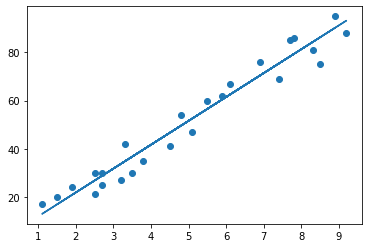

In [16]:
# Plotting the Regression line
line = regressor.coef_*features + regressor.intercept_

# Plotting for the test data
plt.scatter(features, labels)
plt.plot(features, line);
plt.show()

Making Predictions On The **Test Data**

In [17]:
print(test_data)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
test_predictions = regressor.predict(test_data)
test_predictions

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Comparing Actual vs Prediction
actual_vs_predicted = pd.DataFrame({'Actual':test_labels,'Predicted':test_predictions})
actual_vs_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# We can also test the model with our own data 
hours =[[9.25]]
pred = regressor.predict(hours)
print("No of Hours ={}".format(hours))
print("Prediction Score = {}".format(pred[0]))

No of Hours =[[9.25]]
Prediction Score = 93.69173248737539


If The Student Study 9.25 Hours A Day Then He'll Get 93.7% In The Result.

Evaluating Our Model
Now We're Going To Check The Perfromance of Our Model By Calculating The Mean Squared Error And Mean Absolute Error. There Are Many Metrics To Check The Performance of The Model But MAE And MSE Is Used For Linear Regression Problems.

In [21]:
# Evaluating model
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels,test_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test_labels,test_predictions))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


##**Conclusions**

Well, Our Model Has Performed Really Well As You Can See Its Predictions On The Unseen Data Below:

In [22]:
actual_vs_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


There Is A **Slight Difference Between Actual And Predicted Values** Which Can Be Overcomed Using Various Techniques Like **Validating Data**. This Is So Because We've **Very Little Amount of Data**.

In [23]:
# Saving ML model
filename = 'student_perc_ml__model.sav'
pickle.dump(regressor,open(filename, 'wb'))

In [24]:
# Loading saved model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_data, test_labels)
print(result)

0.9454906892105354
